<a href="https://colab.research.google.com/github/MCV-Jimenez/Food-sales-predictions/blob/main/Project_1_Part_3_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Food Sales Predictions**

Marco Jimenez

2/6/2022

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
sales_predictions = '/content/sales_predictions.csv'
df_sales = pd.read_csv(sales_predictions)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [181]:
#1 Identifying the number of rows and columns
rows = df_sales.shape[0]
cols = df_sales.shape[1]
# Displaying the number of rows and columns
print("Rows:" + str(rows))
print("Columns:" + str(cols))

Rows:8523
Columns:12


In [182]:
#2 Identifying data types
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [183]:
# Checking for duplicate rows & columns
df_sales.duplicated().sum()

0

In [184]:
#4 Identifying missing values
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**5** Filling in the missing values in the Item Weight column by mean. I refered to a link posted by Mandy in the discord and used the structure of the code she suggested. 

From what I understand it's grouping the missing weight values by their respective Item Identifiers & filling in the missing values with the average item weight of their group

In [185]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(df_sales.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
# For some reason there are still four missing values but I was unbale to determine why or how to fill them in even with the fillna method
df_sales['Item_Weight'].isnull().sum()

4

**5** Filled the NaN values in the Outlet Size column with "missing" because dropping those rows would remove too much important information, and there was no way to group it with another column in a way that made sense relative to the size of any given store.

In [186]:
df_sales['Outlet_Size'] = df_sales[['Outlet_Size']].fillna("missing")
df_sales['Outlet_Size'] 

0        Medium
1        Medium
2        Medium
3       missing
4          High
         ...   
8518       High
8519    missing
8520      Small
8521     Medium
8522      Small
Name: Outlet_Size, Length: 8523, dtype: object

In [187]:
#6 Confirming that there are no more missing values
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [188]:
#7 Identifying how many unique values are in each column
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   446
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [189]:
#7 Looking at insconsistencies in the Item Fat Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [190]:
# Creating a dictionary of the values I want to replace and what I want to replace them with
replace_fat = {'reg':"Regular",'low fat':"Low Fat", 'LF':"Low Fat"}

**7** The Item Fat Content column should only have the 2 values 'Low Fat' or 'Regular'. [link text](https://)For this answer I referenced a student/instructor exchange on this question in the discord. 

In [203]:
# Filtering the unique values in the fat content column
Item_Fat_Content = df_sales['Item_Fat_Content'].unique()
# Creating a for loop function for the column to replace the incorrect values with the correct values
for Item_Fat_Content in df_sales.Item_Fat_Content:     
    if Item_Fat_Content == "reg":
        print("Regular")
    elif Item_Fat_Content == "low fat":
        print("Low Fat")
    elif Item_Fat_Content == 'LF':
        print("Low Fat")
        continue
        print(Item_Fat_Content).head()
# Applying the for loop function and confirming desired result
df_sales.Item_Fat_Content = df_sales.Item_Fat_Content.replace(replace_fat)
df_sales.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**7** Based on the consistency of the Outlet Type column I can assume that Grocey Store is not a proper entry for this column

In [193]:
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

**7** Since I can't relate 'grocery store' to any particular size I am changing it to 'missing' to provide clarity as to wether or not we know what type of supermarket it is

In [194]:
df_sales['Outlet_Type'] = df_sales['Outlet_Type'].str.replace('Grocery Store','missing')
df_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,missing,Tier 3,missing,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [195]:
#8 Selecting only the numerical columns
mmm_df = df_sales.describe(include=[np.number])
mmm_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.646098,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [196]:
#8 Displaying the min of each numerical column 
mmm_df.min()

Item_Weight                   4.55500
Item_Visibility               0.00000
Item_MRP                     31.29000
Outlet_Establishment_Year     8.37176
Item_Outlet_Sales            33.29000
dtype: float64

In [197]:
#8 Displaying the max of each numerical column
mmm_df.max()

Item_Weight                   8519.0000
Item_Visibility               8523.0000
Item_MRP                      8523.0000
Outlet_Establishment_Year     8523.0000
Item_Outlet_Sales            13086.9648
dtype: float64

In [198]:
#8 Dispplaying the mean of each numerical column
mmm_df.mean()

Item_Weight                  1075.088940
Item_Visibility              1065.452703
Item_MRP                     1180.866156
Outlet_Establishment_Year    2564.150453
Item_Outlet_Sales            3907.614766
dtype: float64

I made a histogram with multiple variables so that I can analyze more than one column of data at a time

Code adapted from source: https://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn

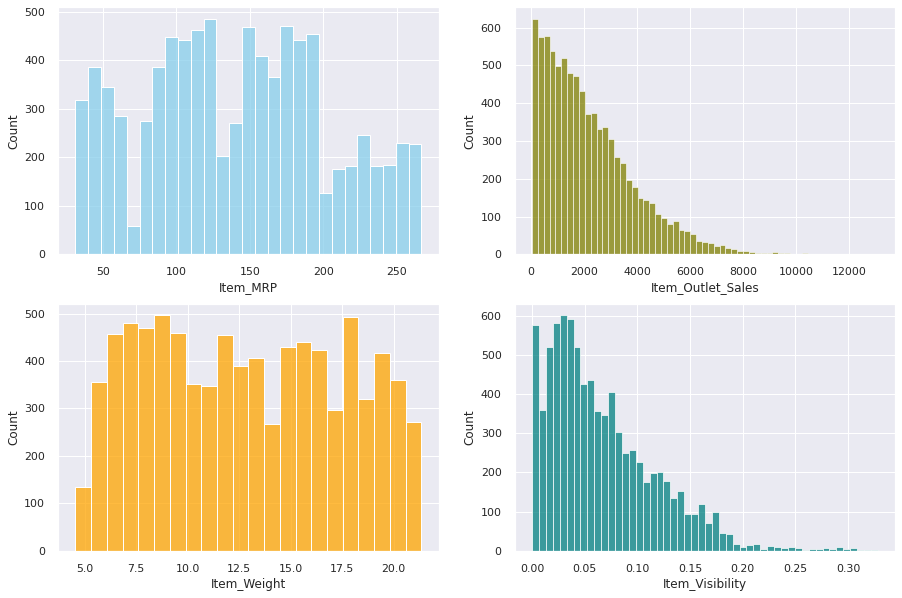

In [199]:
# Changing the histplot figure with to a 2x2 variation to allow up 4 variables to be input and displayed
fig, axs = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(df_sales, bins = 'auto', color="skyblue", x = 'Item_MRP', ax=axs[0,0])
sns.histplot(df_sales, bins = 'auto', color="olive", x = 'Item_Outlet_Sales', ax=axs[0,1])
sns.histplot(df_sales, bins = 'auto', color="orange", x = 'Item_Weight', ax=axs[1,0])
sns.histplot(df_sales, bins = 'auto', color="teal", x = 'Item_Visibility', ax=axs[1,1]);

I plotted my boxplots without specifying a column from the dataframe so that it defaults to diplaying all the numerical columns in my dataset and I can analyze them all at once insteand of individually

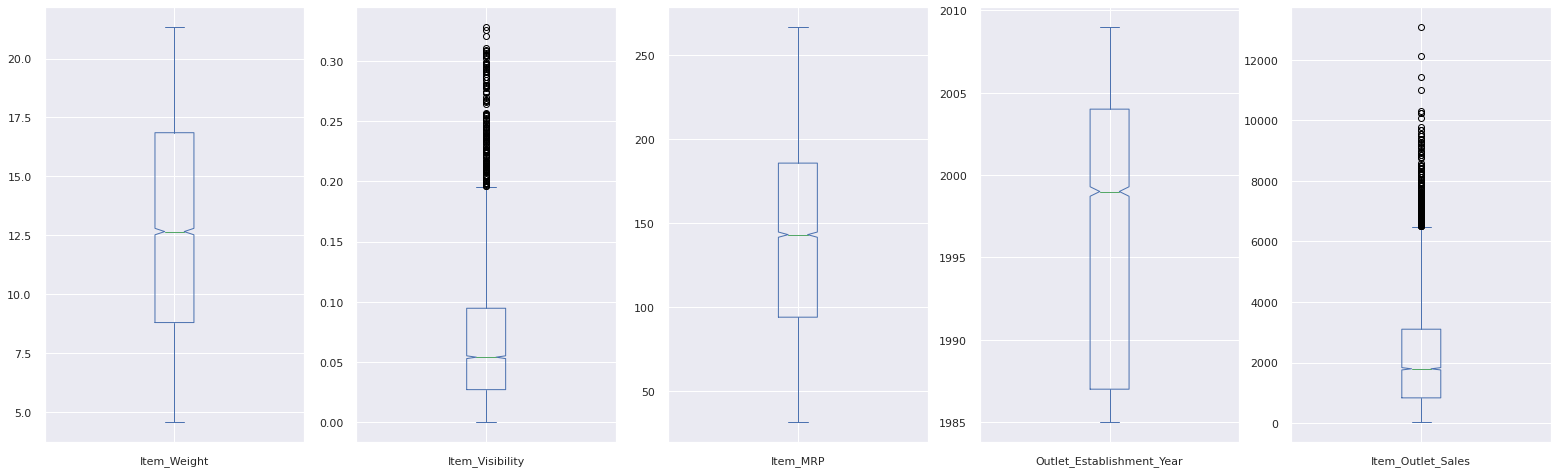

In [200]:
# Applying seaborn style 
sns.set()
# Increasing the size of the figure to separate the boplots to better view the displayed information
plt.rcParams['figure.figsize'] = (27,8)
df_sales.plot(kind = 'box', subplots = True, notch = True);

A heatmap of the dataset suggest that most of the numerical columns have almost no correlation except for a moderate correlation between item max retail price and item outlet sales 

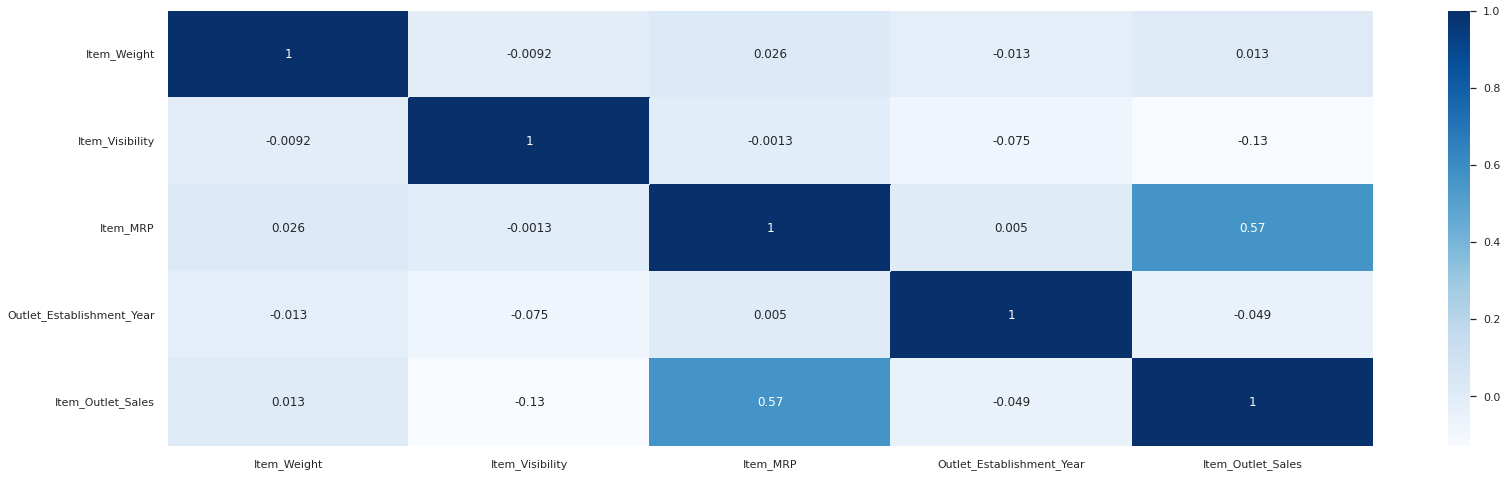

In [201]:
out = df_sales.drop(columns='Outlet_Identifier').corr()  # Dropping the Outlet Identifier column because the heatmap wont read it
plt.xticks(rotation = 0)  # changing the xtixks to 0 degree rotation to eliminate uncccesary white space caused by the xticks being at a 90 degree by default
sns.heatmap(out, annot=True, cmap='Blues');